# SPRINT2 　Linear Regression

## 教師あり学習  
　 　概要：様々な入力の各々に対して正しい出力が何であるかを教えることで、入出力の対応関係を学習する。すると、学習に使用した入力に近い
   　　　　　未学習の入力に対してもある程度正しい出力を出せるようになる。この学習を行うには十分な量の正解データを用意する必要がある。
### ・分類問題  
#### 例：画像に映った犬の犬種を特定する  
事前に、正しい犬種が分かっている犬の写真をたくさん用意し、そこから各犬種を特定するのに役立つ特徴を探し出しておくことで、  
新しい犬の画像が与えられた時に、その画像にある特徴が各犬種の特徴にどの程度一致するかを調べて最も一致の度合いが高い犬種に分類する。

### ・回帰問題   　 　
#### 例：電力需要を予測する  
例えば、月、曜日、時間、天気、気温がどうであれば、電力需要はどうだったという過去のデータからその関係をできるだけうまく表せる式を作り出す。  
その式に、予測したい日のデータを入力して電力需要予測値を出す。


## 教師なし学習
　　 概要：複数の入力データを何らかの特徴に着目していくつかのグループに分類させる。その際、何に着目してどう分類するのが正しいかは教えない。  
　　　　　　対象となるデータがどのような特徴を持った集団なのか、どのようなグループ分けが可能なのかを把握するために使用する。  
　　　　　　この学習によって、人が気づかなかった特徴に気づけるメリットがある一方で、分類された結果がどういう特徴に基づくグループなのかは  
      　　　　　　人が判断する必要がある。





## 半教師あり学習  
　　概要：正解ラベルありのデータを少ししか用意できないが、ラベルなしデータは大量に用意できる際に用いる学習方法。  
  　　　　　例えば、最初にラベルなしデータを教師なし学習で分類しておき、それらに対して正解ラベルありデータの情報を使ってラベル付を行う  
       　　　　　ことによって正解ラベルありデータの量を増やす。そして、増えた正解データを使って学習器を学習させることでより高い精度を出せる  
            　　　　　モデルを作ることができる。

## 強化学習  
　 　概要：学習システムに自分自身の出力がどの程度よかったかを評価する基準を教え、後は自由に出力させる。学習システムは色々な出力を試す中で  
   　　　　　たまたま良い出力を出せた場合、その出力を少しだけ変えた出力を色々試してさらにいい評価を得られる出力を探すということを繰り返して  
        　　　　　成長していく。この学習方法は、正解データを準備するのが困難な課題にも適用できるメリットがあるが、適切な出力評価基準を与えないと  
             　　　　　学習がうまく進まないことがよくある。
   
### 例：２足歩行ロボットを歩かせる  
前提１：どのように各関節を曲げれば歩けるかという正解は教えず、ロボットに自由に関節を動かさせる。  
前提２：進んだ距離を点数として与えることでその動かし方が良かったどうかをロボットが知ることができるようにする。  
  
学習過程１：ある時までうまく進めず点数がもらえていなかった後に、ある動かし方を試してたまたま少し歩けた場合、それまでと比べて良い点数が  
　　　　　　もらえる。  
      
学習過程２：ロボットはさらにいい点数を得ようとして、その動かし方を少しだけ変えた動かし方を色々試していく。すると、さらに長く歩ける動かし方を  
　　　　　　見つける場合がある。  
学習過程３：同様のサイクルを繰り返してより長く歩ける関節の上手な動かし方を獲得していく。

## スクラッチで線形回帰モデルを作成し住宅価格予測を行う

データ取得元：　House Prices: Advanced Regression Techniques　(Kaggle)

### データ取得

In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [283]:
train_df = pd.read_csv("train (1).csv")

### EDA

In [284]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### GrLivArea とSalePriceのプロット

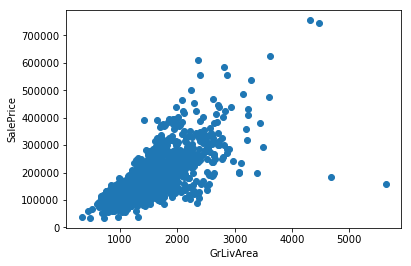

In [285]:
plt.scatter(train_df["GrLivArea"],train_df["SalePrice"])
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

### YearBuiltとGrLivArea のプロット

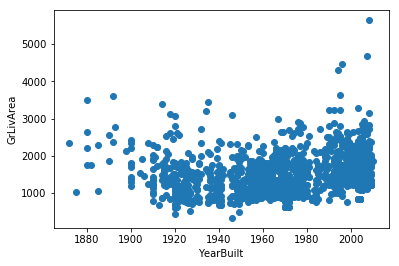

In [286]:
plt.scatter(train_df["YearBuilt"],train_df["GrLivArea"])
plt.xlabel("YearBuilt")
plt.ylabel("GrLivArea")
plt.show()

In [287]:
y = train_df[["SalePrice"]]
type(y)

pandas.core.frame.DataFrame

In [288]:
y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
5,143000
6,307000
7,200000
8,129900
9,118000


## フィーチャースケーリング

- 正規化
- 標準化
- 正規化と標準化の使い分け
- フィーチャースケーリングのメリット

### 正規化とは
複数の数値データを一定のルールに基づいて変形し、利用しやすくすること。  
この場合、ルールとは数値データの範囲を一定の範囲におさめる変換のことであり、主に [ 0, 1 ] か、[ -1, 1 ] の範囲内におさめることが多い。

#### 例：あるクラスの数学と英語のテスト結果表
生徒はA〜Eの５名で、数学は２００点満点、英語は１００点満点

||数学|英語|
|---|---|---|
|A|90|70|
|B|170|80|
|C|110|60|
|D|100|90|
|E|130|80|

- 各教科ごとに、各生徒を比較評価できる
- 教科を跨いでの比較評価が難しい

0〜1の範囲で正規化をすると、

||数学|英語|
|---|---|---|
|A|0|0.33|
|B|1|0.67|
|C|0.25|0|
|D|0.13|1|
|E|0.50|0.67|

各教科ごとに、各生徒を比較評価しつつ（互いの数的関係を維持しつつ）、教科を跨いでの比較評価も可能

### 標準化とは
数値データの平均を0、分散を1の範囲におさめる変換。

||数学|英語|
|---|---|---|
|A|90|70|
|B|170|80|
|C|110|60|
|D|100|90|
|E|130|80|

||数学|英語|
|---|---|---|
|A|-0.948683|-0.526235|
|B|1.581139|0.350823|
|C|-0.316228|-1.403293|
|D|-0.632456|1.227881|
|E|0.316228|0.350823|

各教科ごとに、各生徒を比較評価しつつ（互いの数的関係を維持しつつ）、教科を跨いで、すべての生徒の比較評価が可能  
各教科ごとのクラスの得意不得意の評価も可能

### 正規化、標準化の使い分け

#### 正規化
データが一様分布している場合に用いる

#### 標準化
データがガウス分布の場合に用いる  
大きく外れたデータ（外れ値）に対しても、評価ができる

### フィーチャースケーリングのメリット

数値データの範囲を調整することをフィーチャースケーリングといい、これを行うと学習の収束が比較的早くなるため学習回数を少なくすることができる

### SalePrice を標準化

In [289]:
y = (y - y.mean()) / y.std()
y

,SalePrice
0,0.347154
1,0.007286
2,0.535970
3,-0.515105
4,0.869545
5,-0.477341
6,1.587045
7,0.240159
8,-0.642241
9,-0.792034


In [290]:
X = train_df[['GrLivArea','YearBuilt']]

In [291]:
X

,GrLivArea,YearBuilt
0,1710,2003
1,1262,1976
2,1786,2001
3,1717,1915
4,2198,2000
5,1362,1993
6,1694,2004
7,2090,1973
8,1774,1931
9,1077,1939


### GrLivArea ,YearBuilt を標準化

In [292]:
X = (X - X.mean()) / X.std()
X

,GrLivArea,YearBuilt
0,0.370207,1.050634
1,-0.482347,0.156680
2,0.514836,0.984415
3,0.383528,-1.862993
4,1.298881,0.951306
5,-0.292045,0.719540
6,0.339758,1.083743
7,1.093354,0.057352
8,0.492000,-1.333243
9,-0.834405,-1.068368


#### theta０ 用の列を追加

In [293]:
X["X0"]=1
X

,GrLivArea,YearBuilt,X0
0,0.370207,1.050634,1
1,-0.482347,0.156680,1
2,0.514836,0.984415,1
3,0.383528,-1.862993,1
4,1.298881,0.951306,1
5,-0.292045,0.719540,1
6,0.339758,1.083743,1
7,1.093354,0.057352,1
8,0.492000,-1.333243,1
9,-0.834405,-1.068368,1


### 目的（コスト）関数 

以下の数式を関数化する。

$$ h_\theta(x) =  \theta_0 x_0 + \theta_1 x_1 + ... +\theta_n x_n   (x_0 = 1)\\
J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2 $$

In [294]:
def compute_cost(X, y, theta):
    
    h_x = np.dot(X , theta)
    h_x_y = h_x - y
    m = len(X)
    J_theta = (1/(2*m)) *  (h_x_y * h_x_y).sum()
    
    return J_theta

## θ0の役割

θ0がないとモデルは必ず座標の原点を通ることになる。そのため、原点を通らない対象を表現する場合、  
θ0があるモデルと比べて少なくとも原点付近の表現力が劣るため、その付近の誤差が大きくなる。

### 最急降下法  

以下の数式を関数化する。  
また、その関数の中に上記のコスト関数を入れて各thetaでのコストを記録したリストを出力させる。

$$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)} - y^{(i)} )x_{j}^{(i)}]$$

In [295]:
def gradient_descent(X, y, theta, iterations, alpha):

    m = len(X)
    past_costs =[]
   
    for i in range(iterations):
        past_costs.append(compute_cost(X, y, theta))
        h_x_y = np.dot(X , theta) - y
        theta = theta -  (alpha/m) * np.dot(X.T , h_x_y)  
    
    return past_costs 

### 最急降下法の導出式

$$ \theta_j := \theta_j - \frac{\partial}{\partial \theta_j}J(\theta) $$

J(θ)は以下の式なので

$$J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2$$

θjについて偏微分すると、まず以下のようになる

$$\frac{\partial}{\partial \theta_j}J(\theta)=  \frac{1 }{ m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})\frac{\partial \ (h_\theta(x^{(i)}))}{\partial \theta_j}$$

ここで、h(θ)は以下の式なので、ある1つのθについて偏微分すると、そのθと積をとっているXが残る。

$$ h_\theta(x) =  \theta_0 x_0 + \theta_1 x_1 + ... +\theta_n x_n   (x_0 = 1) $$

よって、

$$\frac{\partial \ (h_\theta(x^{(i)}))}{\partial \theta_j}=x_j$$

以上より、最後に学習率αを掛けると以下の式になる

$$\theta_j := \theta_j  −α\frac{1}{m}\sum_{i=1}^{m}((h_θ(x_i)−y_i)x_j)$$

### 最急降下法が局所最適解を得る場合がある理由

最急降下法は目的関数が作る空間の勾配を下るように変数を更新していく。そのため、いずれ、勾配の終端である最適解を得ることができる場合がある。  
ただし、必ずそうなるとは限らない。例えば、初期値の周辺が勾配が存在しない平坦な空間だった場合は局所最適解は得られない。

### 線形回帰において最急降下法が（大域的）最適解を得られる理由

線形回帰ではモデル内の説明変数の係数(θとする)は１乗である。そして、例えば、目的関数が二乗誤差の式である場合、θは２乗になる。  
目的関数をθについての式とみなした場合、２次関数となる。２次関数は局所解を持たないので、最適解を求めることができる。

### 学習率の選択の仕方

学習率は0.01などの小さい値を選択して学習を行う。そして、学習の進み具合を見て大きさを少しずつ調整する。  
学習率を大きくとると学習が速く進む一方、最適解を通り過ぎてしまう可能性が高くなって良い結果が
得られずUnderfittingの状態になる。  
逆に、学習率を小さくとると、最適解に収束する可能性は高くなるが、その最適解はあくまでも学習サンプルを
使った場合の最適解なので、  
それ以外のデータには良い性能を発揮できなくなるOverfittingの状態になる。


### 学習曲線について

学習曲線は横軸を反復回数、縦軸を目的関数の値にして学習結果を描いた曲線であり、どれくらいの学習回数でどれ程学習が進んだかを把握するときに用いる。
つまり、学習速度が速いか遅いか、学習回数が過剰か不足か、目的関数の値が不十分な状態で学習が収束してしまっていないかなどの情報を得ることができる。
初期値や学習率を変えながら結果を比較することで、初期値や学習率、反復回数を調整する判断材料を得ることができる。

## 学習

#### thetaの初期値を一様乱数で作成

In [305]:
theta = np.random.rand(3,1)

#### 学習率(α)と 反復回数を指定

In [306]:
alpha = 0.2
iterations = 3000

#### 学習実施

In [307]:
p_c = gradient_descent(X_std, y_std, theta, iterations, alpha)

### 学習曲線描画

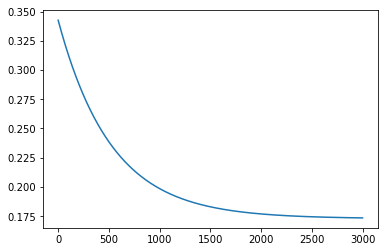

In [332]:
plt.plot(range(0,iterations),p_c)
plt.show()

## クラス化  

上で作成した関数をクラスから呼び出せるようにする。

In [333]:
class LinearModel():

    def __init__(self,X):
        theta = np.random.rand(X.shape[1],1)

    def compute_cost(self,X, y, theta):
        h_x_y = np.dot(X, theta) - y
        m = len(X)
        J_theta = (1/(2 * m)) *  (h_x_y * h_x_y).sum()
    
        return J_theta

    def gradient_descent(self,X, y, theta, iterations, alpha):  
   
        m = len(X)
        past_costs =[]
   
        for i in range(iterations):
            h_x_y = np.dot(X , theta) - y
            theta = theta -  (alpha/m) * np.dot(X.T , h_x_y) 
            past_costs.append(compute_cost(X, y, theta))
    
        return past_costs         

    def plot_learning_curve(self,iterations,past_costs):
        plt.plot(range(0,iterations),past_costs)
        plt.show()
        
        return None
      


In [321]:
iterations = 3000

In [334]:
p_c = LinearModel(X).gradient_descent(X, y, theta, iterations, alpha=0.001)

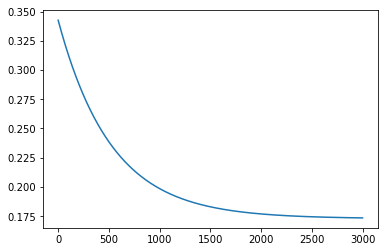

In [335]:
LinearModel.plot_learning_curve(iterations,p_c)

## 最急降下法と正規方程式の比較

・最急降下法  
メリット:　　特徴量が多くても学習が可能  
デメリット:　適切な学習率を設定する必要がある、  
　 　　　　　学習が収束しにくい場合、学習を反復する回数が増え計算量が多くなる  
・正規方程式  
メリット:　　正規方程式を１回解けば最適解が求められる　  
デメリット:　特徴数やデータ数が多くなると行列計算の量が急激に増大する　

## テスト  

作成した関数が正しく動作するかどうかを正しい出力結果がわかる入力を用いて確認する

### コスト関数テスト   
出力結果と正解の差が0.5×10^-6未満であれば成功とする

In [375]:
def test_compute_cost():
    X = pd.DataFrame([[1,1],[2,2]])
    y = pd.DataFrame([[2],[4]])
    theta = pd.DataFrame([[1],[1]])
    
    np.testing.assert_array_almost_equal((compute_cost(X, y, theta)), 0)

テスト実行（テストが成功した場合は何も出力されない）

In [376]:
test_compute_cost()

### 最急降下法関数テスト  
出力結果と正解の差が0.5×10^-6未満であれば成功とする

In [364]:
def test_gradient_descent():
    X = pd.DataFrame([[1,1],[2,2]])
    y = pd.DataFrame([[4],[8]])
    theta = np.random.rand(2,1)
    iterations = 30000
    alpha = 0.02
    
    np.testing.assert_array_almost_equal((gradient_descent\
                                         (X, y, theta, iterations, alpha))\
                                         [iterations-1], 0)

テスト実行（テストが成功した場合は何も出力されない）

In [365]:
test_gradient_descent()

### コスト関数テスト（クラスから呼び出した場合）  
出力結果と正解の差が0.5×10^-6未満であれば成功とする

In [379]:
def test_compute_cost_in_class():
    X = pd.DataFrame([[1,1],[2,2]])
    y = pd.DataFrame([[2],[4]])
    theta = pd.DataFrame([[1],[1]])
    
    np.testing.assert_array_almost_equal((LinearModel(X).compute_cost(X, y, theta)), 0)

テスト実行（テストが成功した場合は何も出力されない）

In [380]:
test_compute_cost_in_class()

### 最急降下法関数テスト（クラスから呼び出した場合）  
出力結果と正解の差が0.5×10^-6未満であれば成功とする

In [381]:
def test_gradient_descent_in_class():
    X = pd.DataFrame([[1,1],[2,2]])
    y = pd.DataFrame([[4],[8]])
    theta = np.random.rand(2,1)
    iterations = 30000
    alpha = 0.02
    
    np.testing.assert_array_almost_equal((LinearModel(X).gradient_descent\
                                         (X, y, theta, iterations, alpha))\
                                         [iterations-1], 0)

テスト実行（テストが成功した場合は何も出力されない）

In [382]:
test_gradient_descent_in_class()